# Churn Prediction of Telecom company
**Anup Kumar Barman**

## Table of Contents
1. **[Introduction](#introduction)**
2. **[Data Understanding](#data_understanding)**
3. **[EDA - Univariate Analysis](#univariate_analysis)**
4. **[EDA - Bivariate Analysis](#bivariate_analysis)**
5. **[Outlier Detection](#outlier_detection)**
6. **[Variable Importance Check](#variable_importance_check)**
7. **[Data Preparation for Moleling](#data_preparation)**
8. **[Logistic Regression Model](#logistic_regression)**
9. **[Logistic Regression with balanced class weight](#logistic_regression2)**
10. **[Variable Importance](#variable_importance)**
11. **[Conclusion](#conclusion)**

<a id='introduction'></a>


## Introduction
Churn prediction aims to detect customers intended to leave a service provider. We will analyse the data and predict how the customer will behave in the future by analyzing their past behavior and prepare a predictive model that can provide correct identification of possible churners in the near future in order to provide a retention solution.
### Variable description
- **Churn** - 1 if customer cancelled service, 0 if not
- **AccountWeeks** - number of weeks customer has had active account
- **ContractRenewal** - 1 if customer recently renewed contract, 0 if not
- **DataPlan** - 1 if customer has data plan, 0 if not
- **DataUsage** - gigabytes of monthly data usage
- **CustServCalls** - number of calls into customer service
- **DayMins** - average daytime minutes per month
- **DayCalls** - average number of daytime calls
- **MonthlyCharge** - average monthly bill
- **OverageFee** - largest overage fee in last 12 months
- **RoamMins** - average number of roaming minutes

In [1]:
# Import important modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import warnings filter
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Set working directory
os.chdir(r"E:\PGP BA - greatlearning\Resd 5\Predictive Modeling\Group Assignment")

In [3]:
# Load dataset
tel_data = pd.read_excel("GA_Dataset.xlsx", sheet_name="Data")

In [4]:
# Make copy of dataset
tel = tel_data.copy()

<a id='data_understanding'></a>

## Dataset Understanding

In [5]:
# Check dataset information
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


- 3333 customer records
- 11 variables (Dependent variable is **Churn** and rest are Independent variables)
- No missing values
- 6 variables with int64 data type
- 5 variables with float64 data type

In [6]:
# Change data type as per data description
tel["Churn"] = tel["Churn"].astype("object")  # dependent variable
tel["ContractRenewal"] = tel["ContractRenewal"].astype("object")
tel["DataPlan"] = tel["DataPlan"].astype("object")

In [7]:
# Check data summary for numerical variables
tel.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


**1.AccountWeeks**
- On an average coustomers have active accounts for 101 weeks.
- Standard deviation is around 40 weeks with minimum of 1 and maximum of 243 weeks.

**2.DataUsage**
- Average data usage is .81GB with a standard deviation of 1.27GB.
- Median data usage is 0GB with maximum usage of 5.4GB.
- 75% of customers use less than 1.78GB of data.

**3.CustServCalls**
- Median customer service call is 1 with maximum of 9 calls.
- 75% of customers called less than 2 times for service.

**4.DayMins**
- On an average in day time coustomers talk 180 minutes in a month.
- Standard deviation is 54 minutes.
- 75% of customers day talk is less than 216 minutes in a month.

**5.DayCalls**
- Average day time calls is 100 in a month with standard deviation of 20 calls.
- 75% of customers make less than 114 calls in a month.

**6.MonthlyCharge**
- Average monthly charge is 56 and median is 53.
- Charges for 75% customers is less than 66, maximum charge being 111.

**7.OverageFee**
- Mean and median for last 12 months Overage fee is 10.
- 75% of overage fee in last 12 months is less than 11, maximum being 18.

**8.RoamMins**
- Mean and median for roaming minutes used is 10.
- 75% of customers used less than 12 minutes in roaming, maximum being 20 minutes.

In [8]:
# Check data summarry for categorical variables
tel.describe(include="O")

,Churn,ContractRenewal,DataPlan
count,3333,3333,3333
unique,2,2,2
top,0,1,0
freq,2850,3010,2411


**1.Churn**(Dependent variable)
- Frequency of **'0'** is 2850 out of 3333 records

**2.ContractRenewal**
- Frequency of **'1'** is 3010 out of 3333 records

**3.DataPlan**
- Frequency of **'0'** is 2411 out of 3333 records

<a id='univariate_analysis'></a>

## EDA - Univariate Analysis

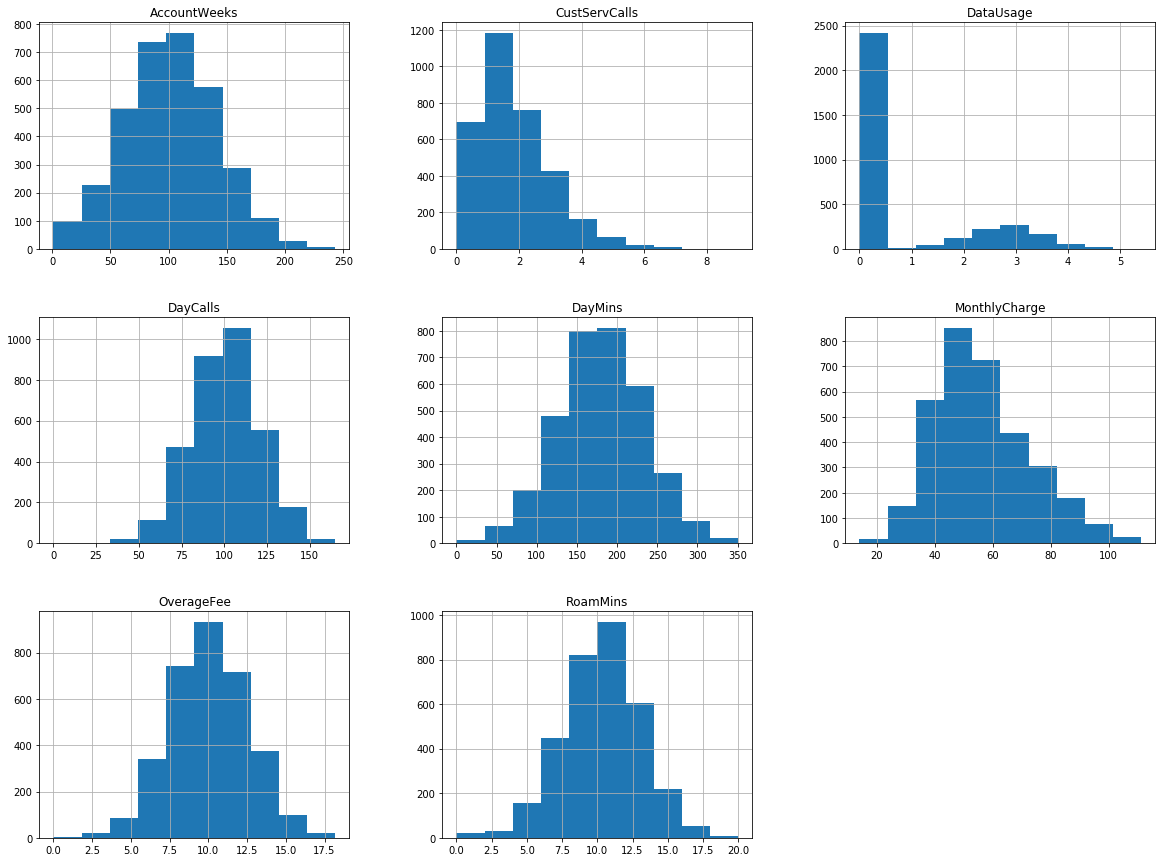

In [9]:
# Check histogram for numerical variables
tel.hist(figsize=(20,15))
plt.show()

- **AccountWeeks**, **DayCalls**, **DayMins**, **OverageFee**, **RoamMins** variables looks normaly distributed.
- **CustServCall** and **MonthlyCharge** looks right skewed.
- **DataUsage** is edge peaked distribution which looks like the normal distribution except that it has a large peak at left tail.

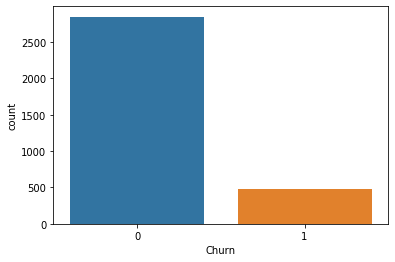

In [10]:
# Check frequency of classes in categorical variables
# Barplot for Churn - dependent variable
sns.countplot(tel["Churn"])
plt.show()

- In depandent variable **Churn**, classes are not balanced.
- Class **'0'** is 85% (customer did not canceled service)
- Class **'1'** is 15% (customer canceled service)

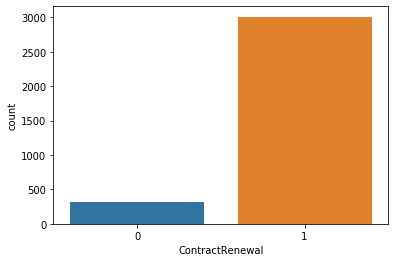

In [11]:
# Barplot for ContractRenewal
sns.countplot(tel["ContractRenewal"])
plt.show()

- In variable **ContractRenewal**, classes are not balanced.
- Class **'0'** is 10% (customer did not renewed contract recently)
- Class **'1'** is 90% (customer recently renewed contract)

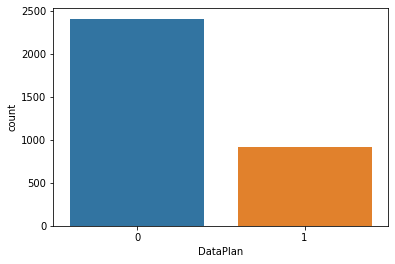

In [12]:
# Barplot for DataPlan
sns.countplot(tel["DataPlan"])
plt.show()

- In variable **DataPlan**, classes are in approximately 70:30 ratio.
- Class **'0'** is 72% (customer dont have data plan)
- Class **'1'** is 28% (customer have data plan)

<a id='bivariate_analysis'></a>

## EDA - Bivariate Analysis

In [13]:
# Check correlation between independent variables
tel.corr()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
DataUsage,0.014391,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


- High positive correlation of 78% between **DataUsage** and **MonthlyCharge**
- Positive correlation of 57% between **DayMins** and **MonthlyCharge**
- Correlation among other variables is very low.

In [14]:
# Get column names of numerical variables
tel.corr().columns

Index(['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls',
       'MonthlyCharge', 'OverageFee', 'RoamMins'],
      dtype='object')

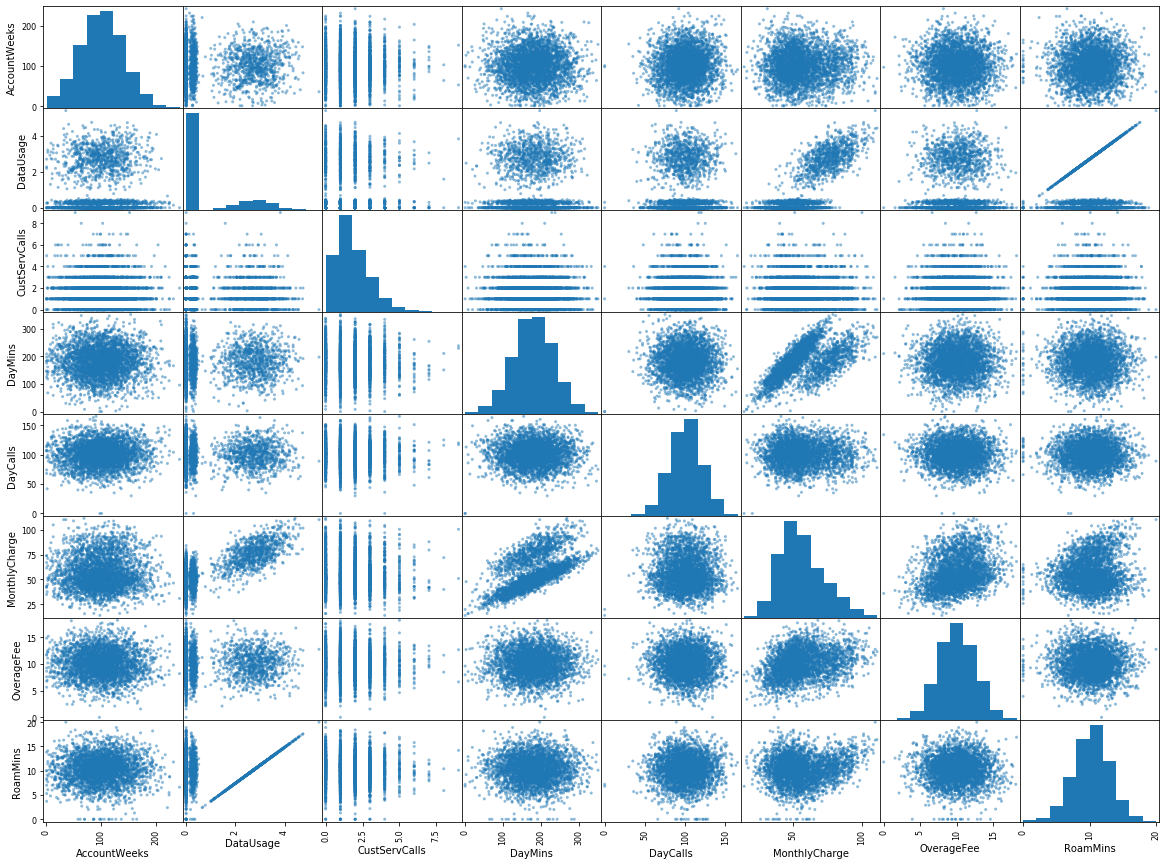

In [15]:
# Visualize the correlation with scatter plot
from pandas.plotting import scatter_matrix
attributes = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']
scatter_matrix(tel[attributes], figsize=(20,15))
plt.show()

- Visually also it is clear that **MonthlyCharge** has positive linear correlation with **Datausage** and **DayMins**.

In [16]:
# Check relationship between dependent and categorical variables
# DataPlan vs Churn status
pd.crosstab(index     = tel["DataPlan"],
            columns   = tel["Churn"],
            margins   = True,
            normalize = "index" )

Churn,0,1
DataPlan,,
0,0.832849,0.167151
1,0.913232,0.086768
All,0.855086,0.144914


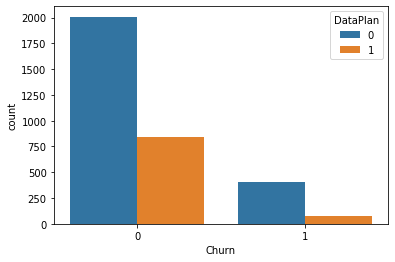

In [17]:
# Barplot of Churn with respect to DataPlan
sns.countplot("Churn", hue="DataPlan", data=tel)
plt.show()

- 17% of customers not using data plan canceled the services.
- Only 9% of customers using data plan canceled the services.
- Most of the customers who canceled the service did not had DataPlan

In [18]:
# ContractRenewal vs Churn status
pd.crosstab(index     = tel["ContractRenewal"],
            columns   = tel["Churn"],
            margins   = True,
            normalize = "index" )

Churn,0,1
ContractRenewal,,
0,0.575851,0.424149
1,0.885050,0.114950
All,0.855086,0.144914


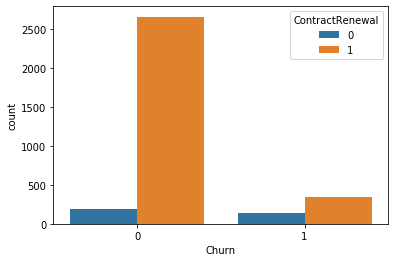

In [19]:
# Barplot of Churn with respect to ContractRenewal
sns.countplot("Churn", hue="ContractRenewal", data=tel)
plt.show()

- 42% of customers who did not renewed the contract recently canceled the services.
- Only 11% of customers who renewed the contract recently canceled the services.
- Customers who canceled services around 72% had renewed the contract recently.

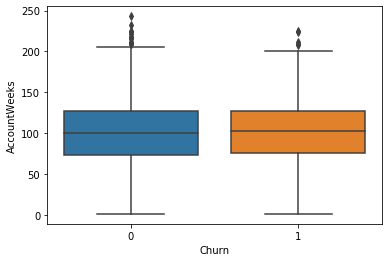

In [20]:
# Check relationship between dependent and numerical variables
# AccountWeeks vs Churn status
sns.boxplot("Churn", "AccountWeeks", data = tel)
plt.show()

- For both the classes of **Churn**, **AccountWeeks** have almost same quartiles with some outliers

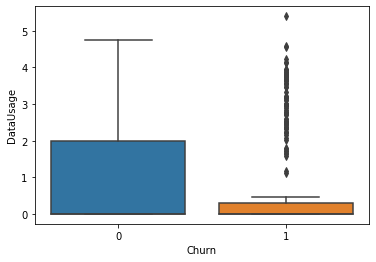

In [21]:
# DataUsage vs Churn status
sns.boxplot("Churn", "DataUsage", data = tel)
plt.show()

- For both the classes of **Churn**, **DataUsage** median is almost zero.
- For class **'0'** - 75% of customers uses below 2GB data per month.
- For class **'1'**  - 75% of customers uses below 0.5GB data per month, it also has many outliers.

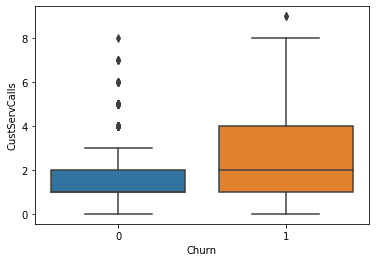

In [22]:
# CustServCalls vs Churn status
sns.boxplot("Churn", "CustServCalls", data = tel)
plt.show()

- For class **'0'**, means customers who did not cancel the service made less calls than the other class, although there are some outliers.
- So **CustServCalls** is an important variable for doing **Churn** prediction.

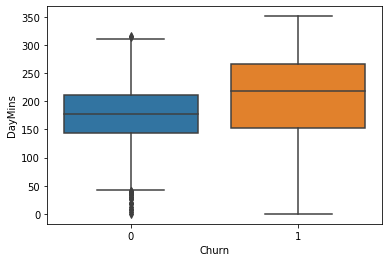

In [23]:
# DayMins vs Churn status
sns.boxplot("Churn", "DayMins", data = tel)
plt.show()

- Median of **DayMins** (average day time minutes per month) for class **'0'** is around 177 minutes, with some outliers.
- Median of **DayMins** (average day time minutes per month) for class **'1'** is around 218 minutes.

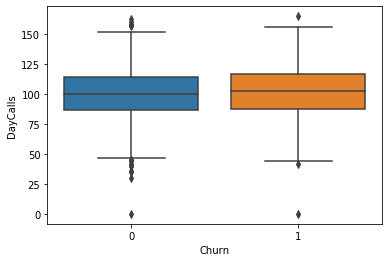

In [24]:
# DayCalls vs Churn status
sns.boxplot("Churn", "DayCalls", data = tel)
plt.show()

- Both the classes of **Churn** have almost same median of 100 day time calls for **DayCalls** variable.
- Both classes have some outliers below and above 1.5 IQR (Inter Quartile Range)

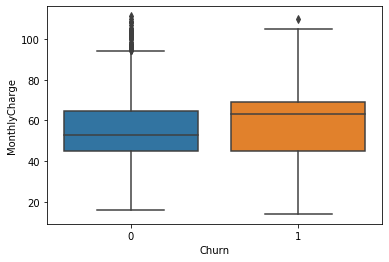

In [25]:
# MonthlyCharge vs Churn status
sns.boxplot("Churn", "MonthlyCharge", data = tel)
plt.show()

- Median of **MonthlyCharge** for class **'0'** of **Churn** is around 55, with some outliers.
- Median of **MonthlyCharge** for class **'1'** of **Churn** is around 65, with 1 outlier.
- Mostly customers paying high monthly charges canceled the service.

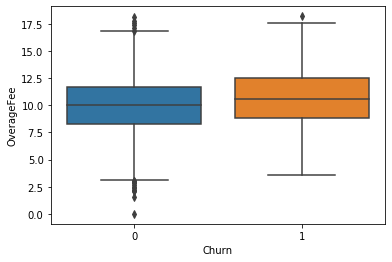

In [26]:
# OverageFee vs Churn status
sns.boxplot("Churn", "OverageFee", data = tel)
plt.show()

- Median of **OverageFee** for class **'0'** of **Churn** is around 10, with some outliers.
- Median of **OverageFee** for class **'1'** of **Churn** is around 10.5, with 1 outlier.

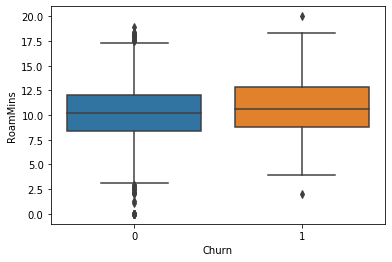

In [27]:
# RoamMins vs Churn status
sns.boxplot("Churn", "RoamMins", data = tel)
plt.show()

- Median of **RoamMins** for class **'0'** of **Churn** is around 10, with some outliers.
- Median of **RoamMins** for class **'1'** of **Churn** is around 10.5, with 1 outlier in each side, below and above 1.5 IQR (Inter Quartile Range).

<a id='outlier_detection'></a>

## Outlier Detection

In [28]:
# Write function to detect outliers
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outlier_indices = list(x.index[(x < lower_bound) | (x > upper_bound)])
    outlier_values = list(x[outlier_indices])
    
    print ("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)
    print("Outliers:" ,outlier_values)

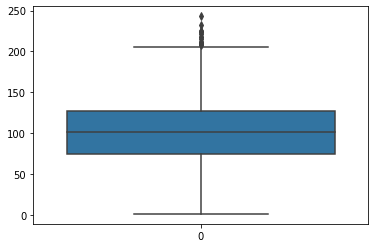

In [29]:
# Check for outliers - AccountWeeks
sns.boxplot(data=tel["AccountWeeks"])
plt.show()

In [30]:
find_outliers(tel["AccountWeeks"])

Lower bound: -5.5
Upper bound: 206.5
Outliers: [208, 215, 209, 224, 243, 217, 210, 212, 232, 225, 225, 224, 212, 210, 217, 209, 221, 209]


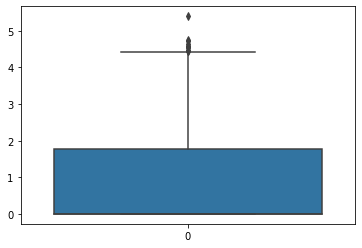

In [31]:
# Check for outliers - DataUsage
sns.boxplot(data=tel["DataUsage"])
plt.show()

In [32]:
find_outliers(tel["DataUsage"])

Lower bound: -2.67
Upper bound: 4.45
Outliers: [5.4, 4.64, 4.73, 4.46, 4.56, 4.56, 4.56, 4.46, 4.75, 4.59, 4.48]


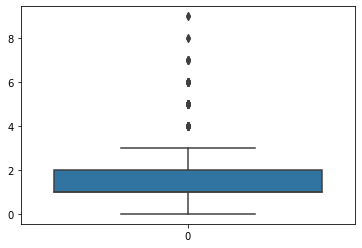

In [33]:
# Check for outliers - CustServCalls
sns.boxplot(data=tel["CustServCalls"])
plt.show()

In [34]:
find_outliers(tel["CustServCalls"])

Lower bound: -0.5
Upper bound: 3.5
Outliers: [4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 7, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 7, 4, 9, 5, 4, 4, 5, 4, 4, 5, 5, 4, 6, 4, 6, 5, 5, 5, 6, 5, 4, 4, 5, 4, 4, 7, 4, 6, 5, 4, 4, 4, 6, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 6, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 6, 4, 5, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 8, 4, 4, 5, 4, 4, 4, 6, 5, 5, 7, 4, 4, 5, 4, 4, 5, 4, 4, 5, 7, 4, 4, 5, 7, 4, 4, 4, 4, 8, 6, 4, 4, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 4, 5, 4, 4, 5, 5, 4, 6, 4, 4, 4, 9, 6, 4, 5, 5, 4, 6, 4, 4, 5, 4, 4, 4, 5, 5, 6, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 6, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 7, 6, 5, 6, 7, 5, 5, 4, 6, 4, 4, 4, 4, 5, 6, 7, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5]


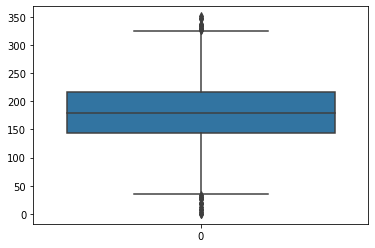

In [35]:
# Check for outliers - DayMins
sns.boxplot(data=tel["DayMins"])
plt.show()

In [36]:
find_outliers(tel["DayMins"])

Lower bound: 34.64999999999996
Upper bound: 325.45000000000005
Outliers: [332.9, 337.4, 326.5, 350.8, 335.5, 30.9, 34.0, 334.3, 346.8, 12.5, 25.9, 0.0, 0.0, 19.5, 329.8, 7.9, 328.1, 27.0, 17.6, 326.3, 345.3, 2.6, 7.8, 18.9, 29.9]


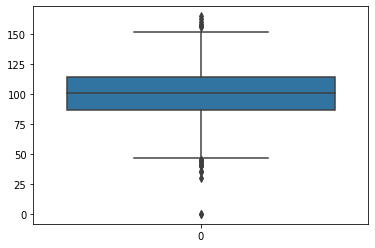

In [37]:
# Check for outliers - DayCalls
sns.boxplot(data=tel["DayCalls"])
plt.show()

In [38]:
find_outliers(tel["DayCalls"])

Lower bound: 46.5
Upper bound: 154.5
Outliers: [158, 163, 36, 40, 158, 165, 30, 42, 0, 45, 0, 45, 160, 156, 35, 42, 158, 157, 45, 44, 44, 44, 40]


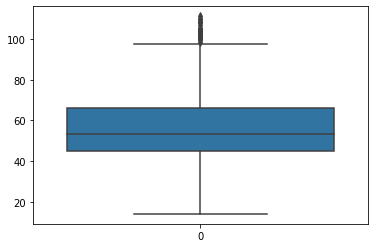

In [39]:
# Check for outliers - MonthlyCharge
sns.boxplot(data=tel["MonthlyCharge"])
plt.show()

In [40]:
find_outliers(tel["MonthlyCharge"])

Lower bound: 13.200000000000017
Upper bound: 97.99999999999997
Outliers: [110.0, 104.30000000000001, 102.9, 101.4, 101.80000000000001, 100.30000000000001, 102.6, 108.30000000000001, 105.6, 101.6, 110.0, 104.69999999999999, 100.5, 101.19999999999999, 102.5, 102.1, 103.9, 98.6, 108.69999999999999, 103.5, 100.30000000000001, 108.6, 111.30000000000001, 101.5, 102.1, 103.80000000000001, 101.6, 103.1, 104.9, 105.19999999999999, 106.9, 102.6, 100.6, 100.0]


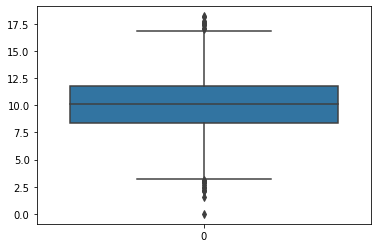

In [41]:
# Check for outliers - OverageFee
sns.boxplot(data=tel["OverageFee"])
plt.show()

In [42]:
find_outliers(tel["OverageFee"])

Lower bound: 3.170000000000001
Upper bound: 16.93
Outliers: [3.1, 17.43, 17.58, 1.56, 17.53, 2.11, 17.37, 2.95, 2.2, 2.65, 2.13, 3.04, 2.93, 2.8, 2.41, 3.0, 17.55, 2.46, 17.0, 18.09, 17.71, 18.19, 0.0, 17.07]


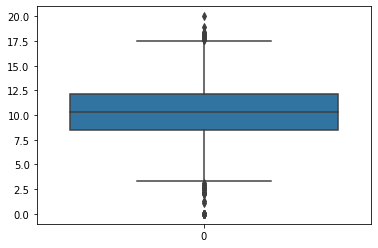

In [43]:
# Check for outliers - RoamMins
sns.boxplot(data=tel["RoamMins"])
plt.show()

In [44]:
find_outliers(tel["RoamMins"])

Lower bound: 3.1000000000000005
Upper bound: 17.5
Outliers: [20.0, 0.0, 17.6, 2.7, 18.9, 0.0, 18.0, 2.0, 0.0, 18.2, 0.0, 0.0, 1.3, 0.0, 0.0, 0.0, 2.2, 18.0, 0.0, 17.9, 0.0, 18.4, 2.0, 17.8, 2.9, 3.1, 17.6, 2.6, 0.0, 0.0, 18.2, 0.0, 18.0, 1.1, 0.0, 18.3, 0.0, 0.0, 2.1, 2.9, 2.1, 2.4, 2.5, 0.0, 0.0, 17.8]


- There are outliers in all numerical variables which are above and below 1.5 IQR, but they are not very extreme values.
- Let's keep the outliers and proceed with model building.

<a id='variable_importance_check'></a>

## Variable Importance Check

In [45]:
# Calculate VIF (Variance Inflation Factor)
# Import function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the variables for VIF
X = tel.loc[:,['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins',
               'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]

# Adding Intercept term which represent a constant
# As OLS, which is used in the python variance inflation factor calculation, does not add an intercept by default
X["Intercept"] = 1  

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

       variables          VIF
0   AccountWeeks     1.002116
1      DataUsage  1945.691222
2  CustServCalls     1.001378
3        DayMins  1030.406916
4       DayCalls     1.002928
5  MonthlyCharge  3240.082012
6     OverageFee   224.401190
7       RoamMins     1.028162
8      Intercept    76.766939


- As we can see very high VIF for **DataUsage**, **DayMins**, **MonthlyCharge** and **OverageFee**.
- We have observed earlier that **MonthlyCharge** variable has high correlation with **DataUsage** and **DayMins**.
- Let's remove **MonthlyCharge** variable and then check the VIF.

In [46]:
# Check VIF after removing MonthlyCharge variable
X_new = tel.loc[:,['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'OverageFee', 'RoamMins']]
X_new["Intercept"] = 1

vif_new = pd.DataFrame()
vif_new["variables"] = X_new.columns
vif_new["VIF"] = [variance_inflation_factor(X_new.values, i)for i in range (X_new.shape[1])]
print(vif_new)

       variables        VIF
0   AccountWeeks   1.001821
1      DataUsage   1.028456
2  CustServCalls   1.001223
3        DayMins   1.000435
4       DayCalls   1.002923
5     OverageFee   1.001289
6       RoamMins   1.028159
7      Intercept  73.762201


- Now VIF for all the variables is around 1, which is good.
- Let's remove **MonthlyCharge** variable and proceed with model building.

<a id='data_preparation'></a>

## Data Preparation for Modeling

In [47]:
# Remove MonthlyChare variable
tel_new = tel.drop("MonthlyCharge", axis=1)
tel_new.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,7.42,10.1


In [48]:
# Change data type of 3 object variables to int64 for modeling
tel_new["Churn"] = tel_new["Churn"].astype("int64")
tel_new["ContractRenewal"] = tel_new["ContractRenewal"].astype("int64")
tel_new["DataPlan"] = tel_new["DataPlan"].astype("int64")
tel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(4), int64(6)
memory usage: 260.5 KB


In [49]:
# Seperate dependent & independent variables
tel_x = tel_new.drop("Churn", axis = 1)
tel_y = tel_new["Churn"]

In [50]:
# Check head of independent variables
tel_x.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,9.87,10.0
1,107,1,1,3.7,1,161.6,123,9.78,13.7
2,137,1,0,0.0,0,243.4,114,6.06,12.2
3,84,0,0,0.0,2,299.4,71,3.10,6.6
4,75,0,0,0.0,3,166.7,113,7.42,10.1


In [51]:
# Check head of dependent variable
tel_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [52]:
# Get train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tel_x, tel_y, test_size=0.3, random_state=123)

In [53]:
print(x_train.shape, x_test.shape)

(2333, 9) (1000, 9)


In [54]:
print(y_train.shape, y_test.shape)

(2333,) (1000,)


<a id='logistic_regression'></a>

## Logistic Regression Model

In [55]:
# Run Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Check intercept and coefficients
print("Intercept:", logistic.intercept_)
print("Coefficients:")
display(pd.DataFrame(logistic.coef_, columns=tel_x.columns))

Intercept: [-4.5235257]
Coefficients:


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0.000839,-1.897486,-1.131573,0.110441,0.49014,0.011932,-0.000542,0.098548,0.038027


In [57]:
# Get prediction on the train data
pred_train = logistic.predict(x_train)
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, pred_train)
print(confusion_matrix_train)

[[1935   49]
 [ 293   56]]


- **True Positive (TP)** - 56 customers who canceled service were predicted *correctly*.
- **True Negative (TN)** - 1935 customers who did not canceled service were predicted *correctly*.
- **False Positive (FP)** - 49 customers who did not canceled service were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 293 customers who canceled service were predicted *incorrectly*. **(Type 2 error)**

In [59]:
# Check Accuracy
from sklearn.metrics import classification_report
class_report_train = classification_report(y_train, pred_train)
print(class_report_train)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1984
           1       0.53      0.16      0.25       349

    accuracy                           0.85      2333
   macro avg       0.70      0.57      0.58      2333
weighted avg       0.82      0.85      0.82      2333



- **Accuracy** - 85% (Overall classification accuracy)
- **Precision** - 53% (When it's predicted that customers canceled service, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 16% (When actually customers canceled service, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 97% (When actually customers did not canceled service, how often is the prediction correct?)
- **F1 score** - 25% (Harmonic mean between Precision & Recall)

In [60]:
# Check the class distribution of training set
y_train.value_counts()

0    1984
1     349
Name: Churn, dtype: int64

- Class distribution is **'0'** - 85% and **'1'** - 15%

In [61]:
# Let's predict on test data
pred_test = logistic.predict(x_test)
confussion_matrix_test = confusion_matrix(y_test, pred_test)
print(confussion_matrix_test)

[[843  23]
 [107  27]]


- **True Positive (TP)** - 27 customers who canceled service were predicted *correctly*.
- **True Negative (TN)** - 843 customers who did not canceled service were predicted *correctly*.
- **False Positive (FP)** - 23 customers who did not canceled service were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 107 customers who canceled service were predicted *incorrectly*. **(Type 2 error)**

In [62]:
# Check Accuracy
class_report_test = classification_report(y_test, pred_test)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       866
           1       0.54      0.20      0.29       134

    accuracy                           0.87      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000



- **Accuracy** - 87% (Overall classification accuracy)
- **Precision** - 54% (When it's predicted that customers canceled service, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 20% (When actually customers canceled service, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 96% (When actually customers did not canceled service, how often is the prediction correct?)
- **F1 score** - 29% (Harmonic mean between Precision & Recall)
- Accuracy on test data is slightly better than train data.
- Need to optimize for **Sensitivity** because *false positives* (customers did not canceled service, predicted as canceled service) are more acceptable than *false negatives* (customers canceled service, but predicted as not canceled)

In [63]:
# Check the class distribution of testing set
y_test.value_counts()

0    866
1    134
Name: Churn, dtype: int64

- Class distribution is **'0'** - 87% and **'1'** - 13%

In [64]:
# Store predicted probabilities of class 1
pred_test_prob = logistic.predict_proba(x_test)[:,1]

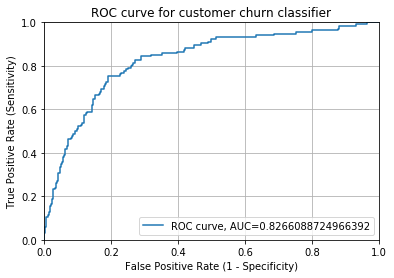

In [65]:
# Get (Receiver operating characteristic)ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, pred_test_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for customer churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 82.7%

<a id='logistic_regression2'></a>

## Logistic Regression with balanced class weight

- As there is class imbalance in dependent variable, lets run Logistic regression with *class_weight* parameter to balance the class weight.

In [66]:
# Run Logistic regression with class_weight parameter
logistic_weight = LogisticRegression(class_weight="balanced")
logistic_weight.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# Check intercept and coefficients
print("Intercept:", logistic_weight.intercept_)
print("Coefficients:")
display(pd.DataFrame(logistic_weight.coef_, columns=tel_x.columns))

Intercept: [-3.47431583]
Coefficients:


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0.001956,-2.216046,-0.917884,0.063208,0.600325,0.013106,0.00122,0.113176,0.041369


In [68]:
# Get predictions on train data
pred_train_wt = logistic_weight.predict(x_train)
pred_train_wt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
# Check confusion matrix
confusion_train = confusion_matrix(y_train, pred_train_wt)
print(confusion_train)

[[1514  470]
 [  87  262]]


In [70]:
# Check Accuracy
report_train = classification_report(y_train, pred_train_wt)
print(report_train)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1984
           1       0.36      0.75      0.48       349

    accuracy                           0.76      2333
   macro avg       0.65      0.76      0.66      2333
weighted avg       0.86      0.76      0.79      2333



- **Accuracy** went down to 76% but **Recall / Senitivity** increased to 75%

In [71]:
# Get predictions on test data 
pred_test_wt = logistic_weight.predict(x_test)
confusion_test = confusion_matrix(y_test, pred_test_wt)
print(confusion_test)

[[671 195]
 [ 30 104]]


- **True Positive (TP)** - 104 customers who canceled service were predicted *correctly*.
- **True Negative (TN)** - 671 customers who did not canceled service were predicted *correctly*.
- **False Positive (FP)** - 195 customers who did not canceled service were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 30 customers who canceled service were predicted *incorrectly*. **(Type 2 error)**

In [72]:
# Check Accuracy
report_test = classification_report(y_test, pred_test_wt)
print(report_test)

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       866
           1       0.35      0.78      0.48       134

    accuracy                           0.78      1000
   macro avg       0.65      0.78      0.67      1000
weighted avg       0.88      0.78      0.81      1000



- **Accuracy** went down from 87% in previous model to 78%.
- **Recall / Senitivity** increased from 20% in previous model to 78%.
- **Precision** went down from 54% in previous model to 35%.
- **F1 score** increased from 29% in previous model to 48%.

In [73]:
# Store predicted probabilities of class 1
pred_prob = logistic_weight.predict_proba(x_test)[:,1]

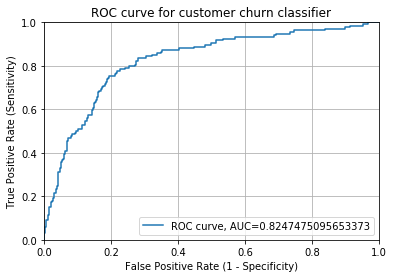

In [74]:
# Get (Receiver operating characteristic)ROC curve
AUC = roc_auc_score(y_test, pred_prob)
FPR, TPR, Thresholds = roc_curve(y_test, pred_prob)
plt.plot(FPR,TPR,label="ROC curve, AUC="+str(AUC))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for customer churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area under the curve is 82.5% which is almost same as previous model.

<a id='variable_importance'></a>

## Variable Importance

In [75]:
# Get variable importance
from sklearn.feature_selection import SelectKBest, chi2
imp_feature = SelectKBest(chi2, k="all").fit(x_train, y_train)

In [76]:
# List important variables as per their score
imp_features_df = pd.DataFrame({'Feature':list(x_train.columns),'Scores':imp_feature.scores_})
imp_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,DayMins,1797.648251
4,CustServCalls,124.529084
0,AccountWeeks,34.651259
3,DataUsage,28.084267
2,DataPlan,14.614137
1,ContractRenewal,12.145073
7,OverageFee,11.355231
8,RoamMins,7.227477
6,DayCalls,2.590947


<a id='conclusion'></a>

## Conclusion

- Logistic Regression model with *class_weight* parameter gives the best result with:
    - Accuracy - 78%
    - Sensitivity - 78%
    - AUC - 82.5%
- Model Accuracy on train data is 76% and Sensitivity is 75%.
- Model performance is slightly lower in train data, model is underfiting with high bias and low variance. (although difference is very minimal)
- Problem of underfitting can be addresed by increasing the sample size, including more useful predictors or by using more complex algorithms like Random Forest.
- Most important variable is **DayMins** followed by **CustServCalls**.
- For customers who canceled service, median of **DayMins** (average day time minutes per month) is around 218 minutes.
- Customers who are making more than 3 service calls are more likely to cancel the service. 
    
    